<a href="https://colab.research.google.com/github/Rickkk2/DataAugmentation/blob/main/Data_Scientist_internship_technical_test_Wiremind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First steps**




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install category_encoders
import category_encoders as ce

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Read dataset and open as dataframe
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset.csv')

In [4]:
df.head(10)

,DocumentRatingSource,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,XXXX,2017,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.050
1,XXXX,2017,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.460
2,XXXX,2017,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.160
3,XXXX,2017,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.150
4,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.080
5,XXXX,2017,OCTOBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,4.2,1,5.980
6,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,7.2,1,10.250
7,XXXX,2017,SEPTEMBER,VBTDDVB,VBTDW0QNSHVLXPOOMDT,JNV,PJMIV5OVXKAFPJMDKYSQRCHI,JNV,ZZZ,YYY,Y,RWCBA,B2324,30.3,1,274.021
8,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,0.3,1,0.430
9,XXXX,2017,NOVEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,9.9,1,14.090


We assume that variable *DocumentRatingSource* is not relevant to our analysis, so we remove it.

In [5]:
df = df.drop(columns=['DocumentRatingSource'])
df.head(10)

,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,2017,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.050
1,2017,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.460
2,2017,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.160
3,2017,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.150
4,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.080
5,2017,OCTOBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,4.2,1,5.980
6,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,7.2,1,10.250
7,2017,SEPTEMBER,VBTDDVB,VBTDW0QNSHVLXPOOMDT,JNV,PJMIV5OVXKAFPJMDKYSQRCHI,JNV,ZZZ,YYY,Y,RWCBA,B2324,30.3,1,274.021
8,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,0.3,1,0.430
9,2017,NOVEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,9.9,1,14.090


In [6]:
df.dtypes

FlownYear                    int64
FlownMonth                  object
AgentCode                   object
AgentName                   object
POS                         object
POSCountryName              object
OriginCode                  object
DestinationCode             object
CargoType                   object
ProductCode                 object
SpecialHandlingCodeList     object
CommodityCode               object
ChargeableWeight           float64
Pieces                       int64
Revenue                    float64
dtype: object

In [7]:
print("There are " + str(df.select_dtypes(include=[np.number]).shape[1]) + " numeric and " + str(df.select_dtypes(exclude=[np.number]).shape[1]) + " categorical columns")

There are 4 numeric and 11 categorical columns


Of the 4 numeric columns, 2 are discrete and 2 are continuous. Of the 11 categorical columns, 1 is ordinal and 10 are nominal.

Since most Machine Learning algorithms cannot handle categorical variables, we will convert them into numerical values.

**Ordinal encoding**

In [8]:
df['FlownMonth'].unique()

array(['NOVEMBER ', 'SEPTEMBER', 'OCTOBER  '], dtype=object)

Note: the values in the *FlownMonth* column contain white spaces, so we remove them.

In [9]:
df['FlownMonth'] = df['FlownMonth'].str.strip()

We do not want to lose the dataframe with the categorical variables, so we make a copy.

In [10]:
df_encoded = df.copy()

In [11]:
month_dict = {'JANUARY': 1,
              'FEBRUARY': 2,
              'MARCH': 3,
              'APRIL': 4,
              'MAY' : 5,
              'JUNE' : 6,
              'JULY' : 7,
              'AUGUST' : 8,
              'SEPTEMBER' : 9,
              'OCTOBER' : 10,
              'NOVEMBER' : 11,
              'DECEMBER' : 12}

In [12]:
df_encoded['FlownMonth'] = df_encoded.FlownMonth.map(month_dict)

In [13]:
df_encoded.head(10)

,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,2017,11,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.050
1,2017,9,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.460
2,2017,9,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.160
3,2017,10,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.150
4,2017,9,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.080
5,2017,10,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,4.2,1,5.980
6,2017,9,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,7.2,1,10.250
7,2017,9,VBTDDVB,VBTDW0QNSHVLXPOOMDT,JNV,PJMIV5OVXKAFPJMDKYSQRCHI,JNV,ZZZ,YYY,Y,RWCBA,B2324,30.3,1,274.021
8,2017,9,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,0.3,1,0.430
9,2017,11,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,9.9,1,14.090


**Binary encoding**

In [14]:
ce_be = ce.BinaryEncoder(cols=['AgentCode', 'AgentName', 'POS', 'POSCountryName', 'OriginCode',
                               'DestinationCode', 'CargoType', 'ProductCode', 'SpecialHandlingCodeList', 'CommodityCode']);
df_encoded = ce_be.fit_transform(df_encoded);

In [15]:
df_encoded.head(10)

,FlownYear,FlownMonth,AgentCode_0,AgentCode_1,AgentCode_2,AgentCode_3,AgentCode_4,AgentCode_5,AgentCode_6,AgentCode_7,...,CommodityCode_1,CommodityCode_2,CommodityCode_3,CommodityCode_4,CommodityCode_5,CommodityCode_6,CommodityCode_7,ChargeableWeight,Pieces,Revenue
0,2017,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,21.0,1,15.050
1,2017,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,13.2,1,9.460
2,2017,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,15.6,1,9.160
3,2017,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3.0,1,2.150
4,2017,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,12.0,1,17.080
5,2017,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,4.2,1,5.980
6,2017,9,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,7.2,1,10.250
7,2017,9,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,30.3,1,274.021
8,2017,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.3,1,0.430
9,2017,11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,9.9,1,14.090


**Missing values and outliers**



In [16]:
print("Let's check whether dataframe contains missing values: " + str(df_encoded.isnull().values.any()))

Let's check whether dataframe contains missing values: False


In [17]:
# Function to find out outliers in a given variable using the Interquartile range (IQR) method
def getOutliers(column):
  percentile25 = column.quantile(0.25)
  percentile75 = column.quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + iqr*1.5
  lower_limit = percentile25 - iqr*1.5
  return df_encoded[(column < lower_limit) | (column > upper_limit)]

In [18]:
numeric_variables = ['FlownYear', 'ChargeableWeight', 'Pieces' , 'Revenue']
for i in numeric_variables:
  print("There are " + str(getOutliers(df_encoded[i]).shape[0]) + " outliers in " + i + ", which represents a "
        + str(getOutliers(df_encoded[i]).shape[0]/df_encoded[i].shape[0]*100) + "%")

There are 0 outliers in FlownYear, which represents a 0.0%
There are 869 outliers in ChargeableWeight, which represents a 11.711590296495956%
There are 871 outliers in Pieces, which represents a 11.738544474393532%
There are 1078 outliers in Revenue, which represents a 14.528301886792452%


In [19]:
df_encoded[numeric_variables].describe()

,FlownYear,ChargeableWeight,Pieces,Revenue
count,7420.0,7420.000000,7420.000000,7.420000e+03
mean,2017.0,2276.926132,20.956873,1.353375e+04
std,0.0,5991.667675,67.731589,9.030922e+04
min,2017.0,0.300000,1.000000,0.000000e+00
25%,2017.0,177.000000,1.000000,1.849375e+02
50%,2017.0,639.000000,5.000000,4.700550e+02
75%,2017.0,1998.000000,14.000000,1.639300e+03
max,2017.0,177078.000000,2000.000000,1.825425e+06


Problematic outliers to be removed represent measurement errors, data entry or processing errors, or poor sampling. However, this does not seem to be the case, since the character of the variable admits natural variations without any value looking incorrect.

# **Descriptive statistics**

Our objective is to analyze a client's willingness to pay based on the specifics of the shipment. Therefore, the dependent variable to be studied is *Revenue*.

## **Graphical representations**

For categorical variables, we will use bar charts and pie charts. In order to graphically represent these variables we will use the uncoded dataframe, *df*.

In [20]:
categorical_variables = ['FlownMonth', 'AgentCode', 'AgentName', 'POS', 'POSCountryName', 'OriginCode',
                               'DestinationCode', 'CargoType', 'ProductCode', 'SpecialHandlingCodeList', 'CommodityCode']

for i in categorical_variables:
  print("There are " + str(df[i].nunique()) + " unique ocurrences in " + i)

There are 3 unique ocurrences in FlownMonth
There are 679 unique ocurrences in AgentCode
There are 664 unique ocurrences in AgentName
There are 147 unique ocurrences in POS
There are 62 unique ocurrences in POSCountryName
There are 144 unique ocurrences in OriginCode
There are 1 unique ocurrences in DestinationCode
There are 3 unique ocurrences in CargoType
There are 18 unique ocurrences in ProductCode
There are 552 unique ocurrences in SpecialHandlingCodeList
There are 222 unique ocurrences in CommodityCode


From the above result it can be seen that shipments are sold in 147 cities in 62 countries. In addition, there are 3 cities from which transportation does not start.

Another interesting point is that there are 679 agent codes, but only 664 agent names. Either it is possible that the same agent has more than one code, or it is an error.

Let's draw a bar chart and a pie chart of the airline's revenue by month.

In [21]:
df_FM = df[['FlownMonth', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_FM.set_index('FlownMonth', inplace=True);
df_FM = df_FM.groupby(['FlownMonth']).sum();
df_FM = df_FM.reindex(['SEPTEMBER', 'OCTOBER', 'NOVEMBER']);
df_FM.head()

,ChargeableWeight,Pieces,Revenue
FlownMonth,,,
SEPTEMBER,5445251.1,51088,2.147770e+07
OCTOBER,5863149.3,45253,3.650571e+07
NOVEMBER,5586391.5,59159,4.243704e+07


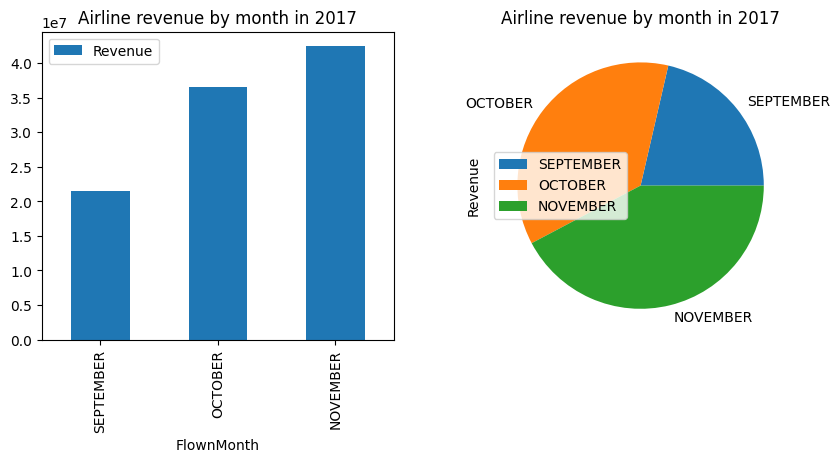

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
df_FM.plot(y = "Revenue", kind = 'bar', title = "Airline revenue by month in 2017", ax=ax1);
df_FM.plot(y = "Revenue", kind = 'pie', title = "Airline revenue by month in 2017", ax=ax2);

In [23]:
print("In September, the airline earned $" + str(df_FM['Revenue']['SEPTEMBER']) +
      ", which represents a " + str(df_FM['Revenue']['SEPTEMBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")
print("In October, the airline earned $" + str(df_FM['Revenue']['OCTOBER']) +
      ", which represents a " + str(df_FM['Revenue']['OCTOBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")
print("In November, the airline earned $" + str(df_FM['Revenue']['NOVEMBER']) +
      ", which represents a " + str(df_FM['Revenue']['NOVEMBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")

In September, the airline earned $21477703.693, which represents a 21.387778187809534% of total revenues
In October, the airline earned $36505709.73, which represents a 36.352863111165384% of total revenues
In November, the airline earned $42437039.344, which represents a 42.259358701025086% of total revenues


We can observe a growth in revenues over time.

Let's draw a bar chart and a pie chart of the airline's revenue, total weight, and total pieces by type of shipment.

In [24]:
df_CT = df[['CargoType', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_CT.set_index('CargoType', inplace=True);
df_CT = df_CT.groupby(['CargoType']).sum();
df_CT.head()

,ChargeableWeight,Pieces,Revenue
CargoType,,,
XXX,423637.5,3154,3.426102e+06
YYY,26767.8,841,2.467078e+06
ZZZ,16444386.6,151505,9.452727e+07


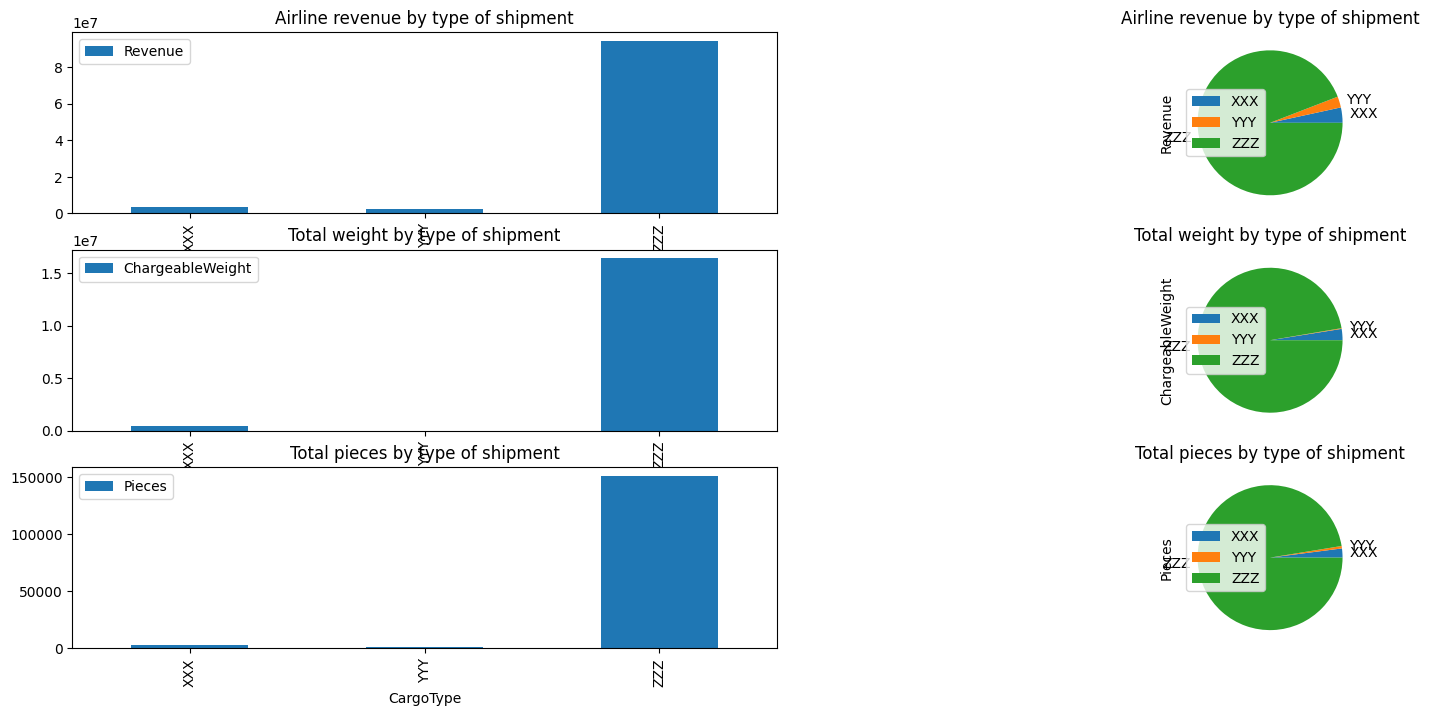

In [25]:
fig, ((ax1,ax2),(a3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20, 8))
df_CT.plot(y = "Revenue", kind = 'bar', title = "Airline revenue by type of shipment", ax=ax1);
df_CT.plot(y = "Revenue", kind = 'pie', title = "Airline revenue by type of shipment", ax=ax2);
df_CT.plot(y = "ChargeableWeight", kind = 'bar', title = "Total weight by type of shipment", ax=a3);
df_CT.plot(y = "ChargeableWeight", kind = 'pie', title = "Total weight by type of shipment", ax=ax4);
df_CT.plot(y = "Pieces", kind = 'bar', title = "Total pieces by type of shipment", ax=ax5);
df_CT.plot(y = "Pieces", kind = 'pie', title = "Total pieces by type of shipment", ax=ax6);

In [26]:
print("For XXX, the airline earned $" + str(df_CT['Revenue']['XXX']) +
      ", which represents a " + str(df_CT['Revenue']['XXX']/df_CT['Revenue'].sum()*100) + "% of total revenues")
print("For YYY, the airline earned $" + str(df_CT['Revenue']['YYY']) +
      ", which represents a " + str(df_CT['Revenue']['YYY']/df_CT['Revenue'].sum()*100) + "% of total revenues")
print("For ZZZ, the airline earned $" + str(df_CT['Revenue']['ZZZ']) +
      ", which represents a " + str(df_CT['Revenue']['ZZZ']/df_CT['Revenue'].sum()*100) + "% of total revenues")

print("\n")

print("For XXX, the airline loaded " + str(df_CT['ChargeableWeight']['XXX']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['XXX']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For YYY, the airline loaded " + str(df_CT['ChargeableWeight']['YYY']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['YYY']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For ZZZ, the airline loaded " + str(df_CT['ChargeableWeight']['ZZZ']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['ZZZ']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")

print("\n")

print("For XXX, the airline loaded " + str(df_CT['Pieces']['XXX']) +
      " pieces, which represents a " + str(df_CT['Pieces']['XXX']/df_CT['Pieces'].sum()*100) + "% of the total pieces")
print("For YYY, the airline loaded " + str(df_CT['Pieces']['YYY']) +
      " pieces, which represents a " + str(df_CT['Pieces']['YYY']/df_CT['Pieces'].sum()*100) + "% of the total pieces")
print("For ZZZ, the airline loaded " + str(df_CT['Pieces']['ZZZ']) +
      " pieces, which represents a " + str(df_CT['Pieces']['ZZZ']/df_CT['Pieces'].sum()*100) + "% of the total pieces")

print("\n")

print("For a shipment XXX, the kg is paid at $" + str(df_CT['Revenue']['XXX']/df_CT['ChargeableWeight']['XXX']) + ", and the piece at $" +
      str(df_CT['Revenue']['XXX']/df_CT['Pieces']['XXX']))
print("For a shipment YYY, the kg is paid at $" + str(df_CT['Revenue']['YYY']/df_CT['ChargeableWeight']['YYY']) + ", and the piece at $" +
      str(df_CT['Revenue']['YYY']/df_CT['Pieces']['YYY']))
print("For a shipment ZZZ, the kg is paid at $" + str(df_CT['Revenue']['ZZZ']/df_CT['ChargeableWeight']['ZZZ']) + ", and the piece at $" +
      str(df_CT['Revenue']['ZZZ']/df_CT['Pieces']['ZZZ']))

For XXX, the airline earned $3426101.54, which represents a 3.4117567144906165% of total revenues
For YYY, the airline earned $2467078.251, which represents a 2.4567487827646275% of total revenues
For ZZZ, the airline earned $94527272.976, which represents a 94.13149450274476% of total revenues


For XXX, the airline loaded 423637.5 kg, which represents a 2.5075035105936996% of the total cargo
For YYY, the airline loaded 26767.8 kg, which represents a 0.15843817525802137% of the total cargo
For ZZZ, the airline loaded 16444386.6 kg, which represents a 97.33405831414828% of the total cargo


For XXX, the airline loaded 3154 pieces, which represents a 2.0282958199356913% of the total pieces
For YYY, the airline loaded 841 pieces, which represents a 0.5408360128617363% of the total pieces
For ZZZ, the airline loaded 151505 pieces, which represents a 97.43086816720258% of the total pieces


For a shipment XXX, the kg is paid at $8.08734245669942, and the piece at $1086.271889663919
For a s

It is clear that YYY cargo is the most lucrative, followed by XXX. However, the airline's business model is based on the transportation of ZZZ cargo, as it represents more than 90% of orders and accounts for more than 90% of total revenues.

Let's draw a bar chart and a pie chart of the airline's revenue, total weight, and total pieces by code of product


In [27]:
df_PC = df[['ProductCode', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_PC.set_index('ProductCode', inplace=True);
df_PC = df_PC.groupby(['ProductCode']).sum();
df_PC.head(18)

,ChargeableWeight,Pieces,Revenue
ProductCode,,,
DLJ,11184623.1,71614,1.947279e+07
MGK,4731531.0,76887,7.292974e+07
MGV,47806.5,71,9.071101e+04
MNL,183.0,2,3.629330e+03
PCS,135.0,1,4.950000e+01
PEU,155926.5,340,1.723011e+05
RLT,4614.0,157,8.387400e+03
SDF,226.5,10,4.257500e+02
SJD,15922.5,647,3.346327e+05


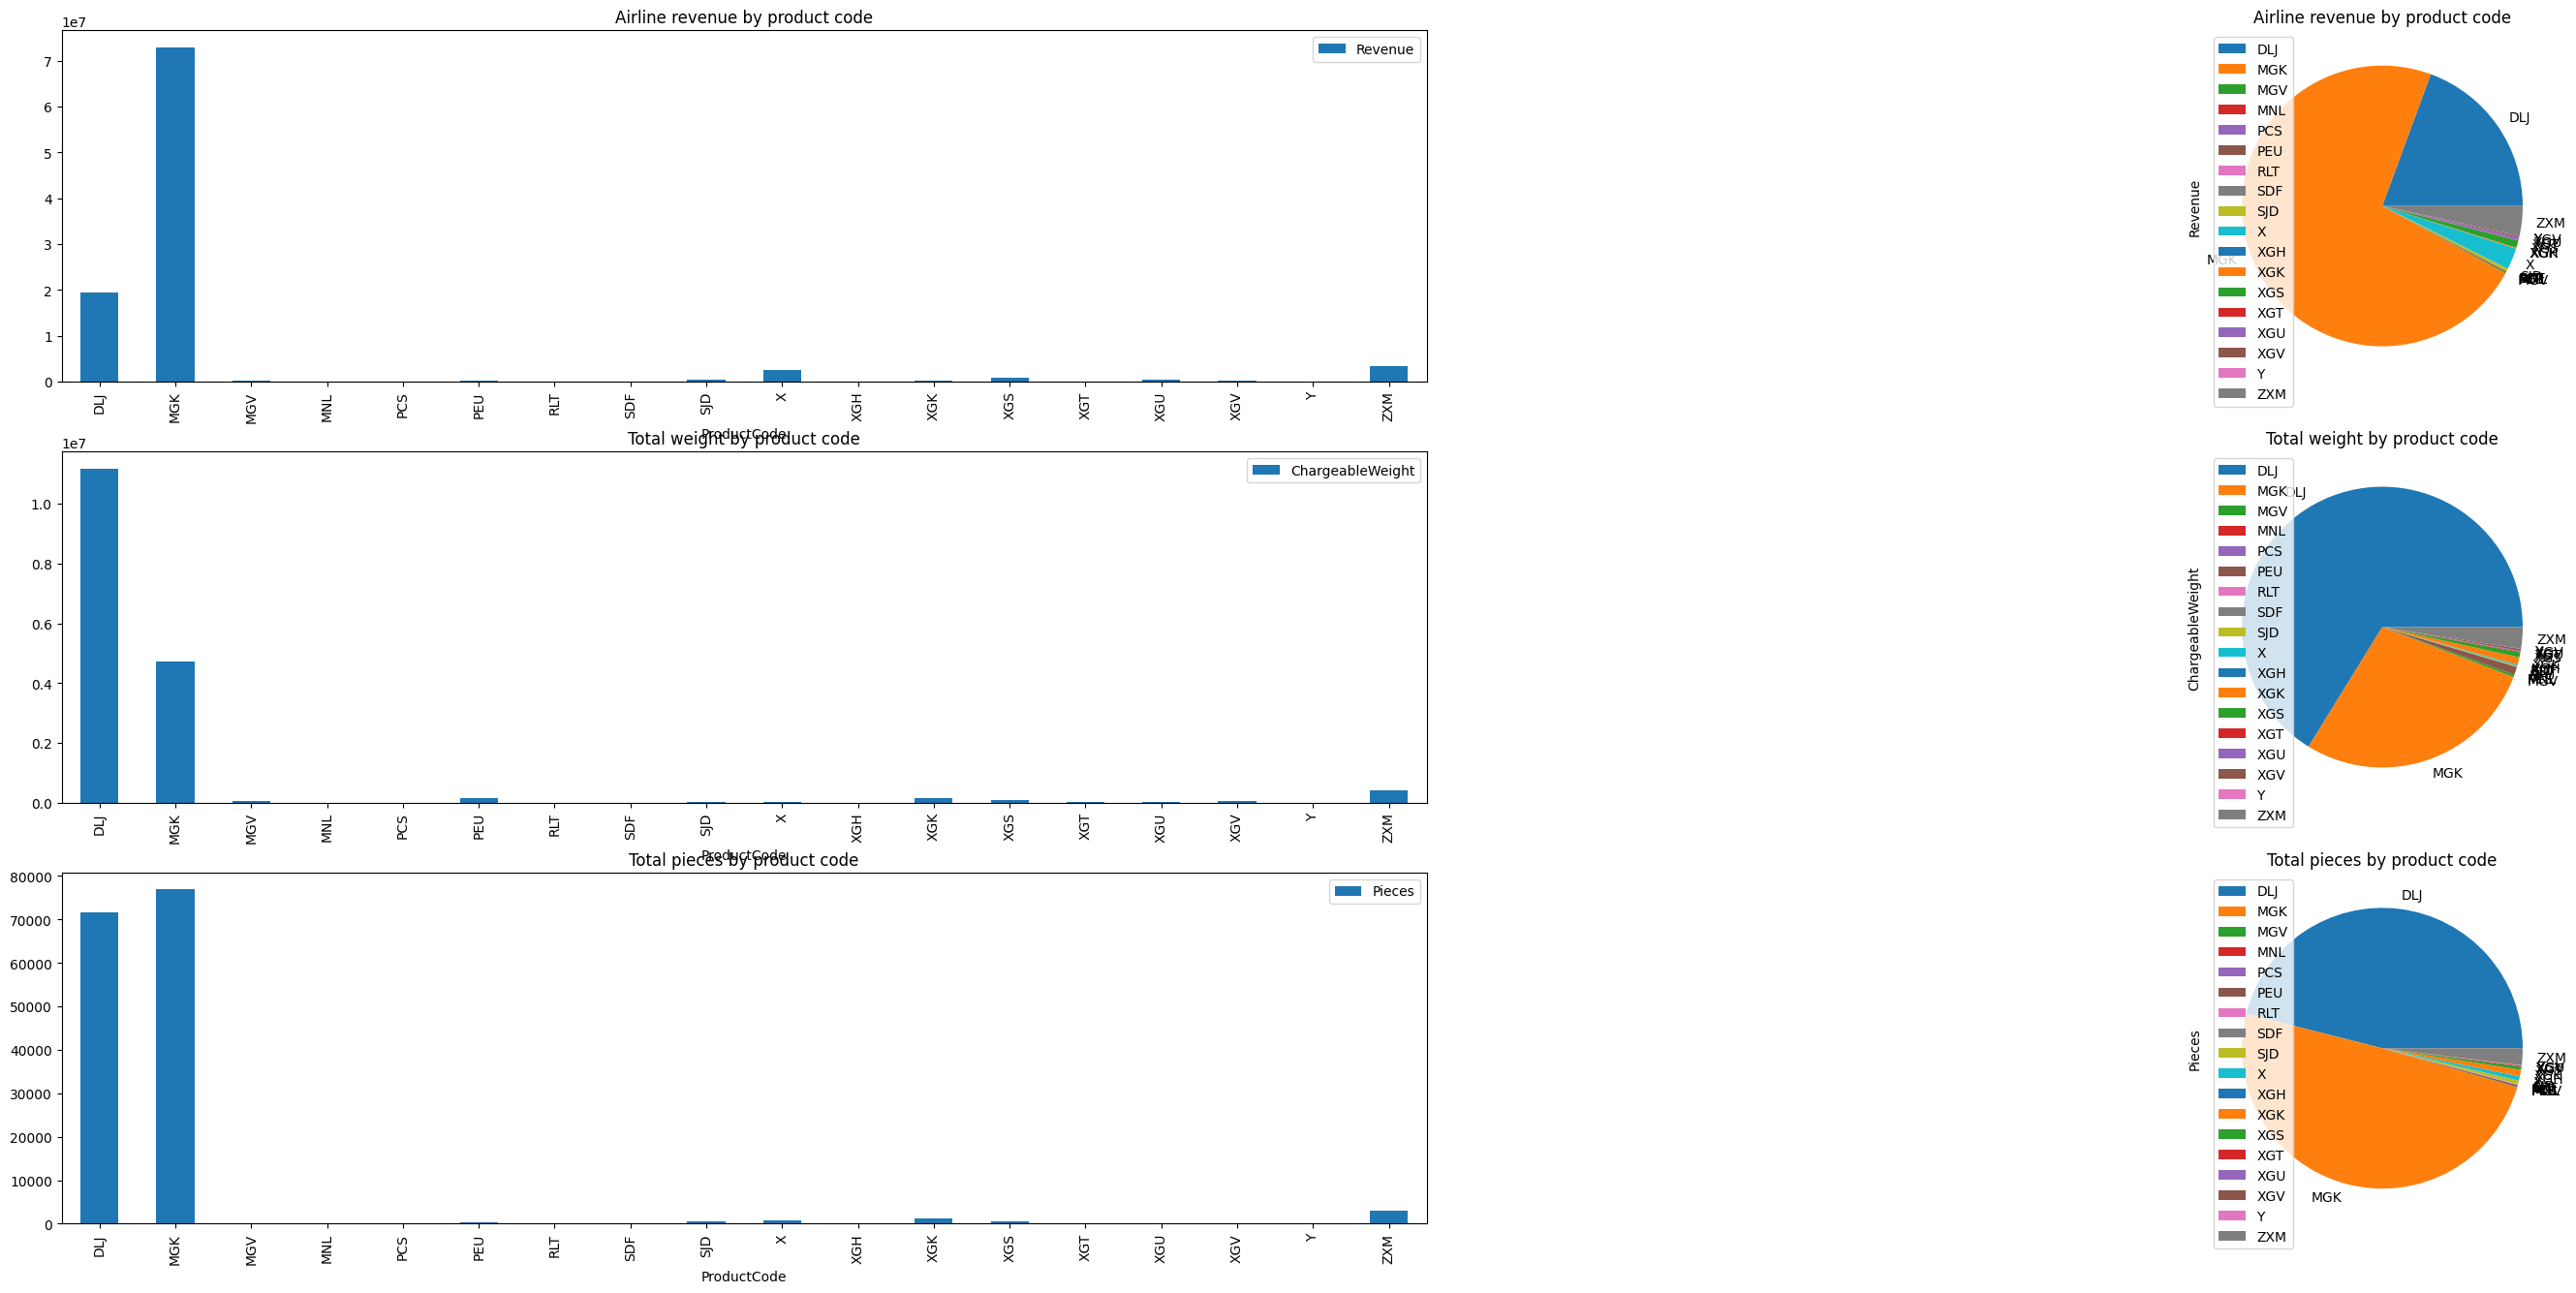

In [28]:
fig, ((ax1,ax2),(a3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(40, 16))
df_PC.plot(y = "Revenue", kind = 'bar', title = "Airline revenue by product code", ax=ax1);
df_PC.plot(y = "Revenue", kind = 'pie', title = "Airline revenue by product code", ax=ax2);
df_PC.plot(y = "ChargeableWeight", kind = 'bar', title = "Total weight by product code", ax=a3);
df_PC.plot(y = "ChargeableWeight", kind = 'pie', title = "Total weight by product code", ax=ax4);
df_PC.plot(y = "Pieces", kind = 'bar', title = "Total pieces by product code", ax=ax5);
df_PC.plot(y = "Pieces", kind = 'pie', title = "Total pieces by product code", ax=ax6);

There are 18 different products, so for the sake of simplicity we will choose only the 3 most representative ones, which cover more than 95%.

In [29]:
print("For DLJ, the airline earned $" + str(df_PC['Revenue']['DLJ']) +
      ", which represents a " + str(df_PC['Revenue']['DLJ']/df_PC['Revenue'].sum()*100) + "% of total revenues")
print("For MGK, the airline earned $" + str(df_PC['Revenue']['MGK']) +
      ", which represents a " + str(df_PC['Revenue']['MGK']/df_PC['Revenue'].sum()*100) + "% of total revenues")
print("For ZXM, the airline earned $" + str(df_PC['Revenue']['ZXM']) +
      ", which represents a " + str(df_PC['Revenue']['ZXM']/df_PC['Revenue'].sum()*100) + "% of total revenues")

print("\n")

print("For DLJ, the airline loaded " + str(df_PC['ChargeableWeight']['DLJ']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['DLJ']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For MGK, the airline loaded " + str(df_PC['ChargeableWeight']['MGK']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['MGK']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For ZXM, the airline loaded " + str(df_PC['ChargeableWeight']['ZXM']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['ZXM']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")

print("\n")

print("For DLJ, the airline loaded " + str(df_PC['Pieces']['DLJ']) +
      " pieces, which represents a " + str(df_PC['Pieces']['DLJ']/df_PC['Pieces'].sum()*100) + "% of the total pieces")
print("For MGK, the airline loaded " + str(df_PC['Pieces']['MGK']) +
      " pieces, which represents a " + str(df_PC['Pieces']['MGK']/df_PC['Pieces'].sum()*100) + "% of the total pieces")
print("For ZXM, the airline loaded " + str(df_PC['Pieces']['ZXM']) +
      " pieces, which represents a " + str(df_PC['Pieces']['ZXM']/df_PC['Pieces'].sum()*100) + "% of the total pieces")

print("\n")

print("For a product DLJ, the kg is paid at $" + str(df_PC['Revenue']['DLJ']/df_PC['ChargeableWeight']['DLJ']) + ", and the piece at $" +
      str(df_PC['Revenue']['DLJ']/df_PC['Pieces']['DLJ']))
print("For a product MGK, the kg is paid at $" + str(df_PC['Revenue']['MGK']/df_PC['ChargeableWeight']['MGK']) + ", and the piece at $" +
      str(df_PC['Revenue']['MGK']/df_PC['Pieces']['MGK']))
print("For a product ZXM, the kg is paid at $" + str(df_PC['Revenue']['ZXM']/df_PC['ChargeableWeight']['ZXM']) + ", and the piece at $" +
      str(df_PC['Revenue']['ZXM']/df_PC['Pieces']['ZXM']))

For DLJ, the airline earned $19472790.516, which represents a 19.39125942917389% of total revenues
For MGK, the airline earned $72929744.345, which represents a 72.62439307480004% of total revenues
For ZXM, the airline earned $3417714.14, which represents a 3.403404431893901% of total revenues


For DLJ, the airline loaded 11184623.1 kg, which represents a 66.20160322898089% of the total cargo
For MGK, the airline loaded 4731531.0 kg, which represents a 28.005855461291596% of the total cargo
For ZXM, the airline loaded 419023.5 kg, which represents a 2.4801933192204637% of the total cargo


For DLJ, the airline loaded 71614 pieces, which represents a 46.0540192926045% of the total pieces
For MGK, the airline loaded 76887 pieces, which represents a 49.445016077170415% of the total pieces
For ZXM, the airline loaded 2997 pieces, which represents a 1.927331189710611% of the total pieces


For a product DLJ, the kg is paid at $1.7410323389439917, and the piece at $271.91318060714383
For a 

The MGK and DLJ products load a similar number of pieces, but the former weighs less than half as much as the latter and accounts for most of the revenue.

For discrete numeric variables, we will use bar charts.

For continuous numerical variables, we will use histogram.

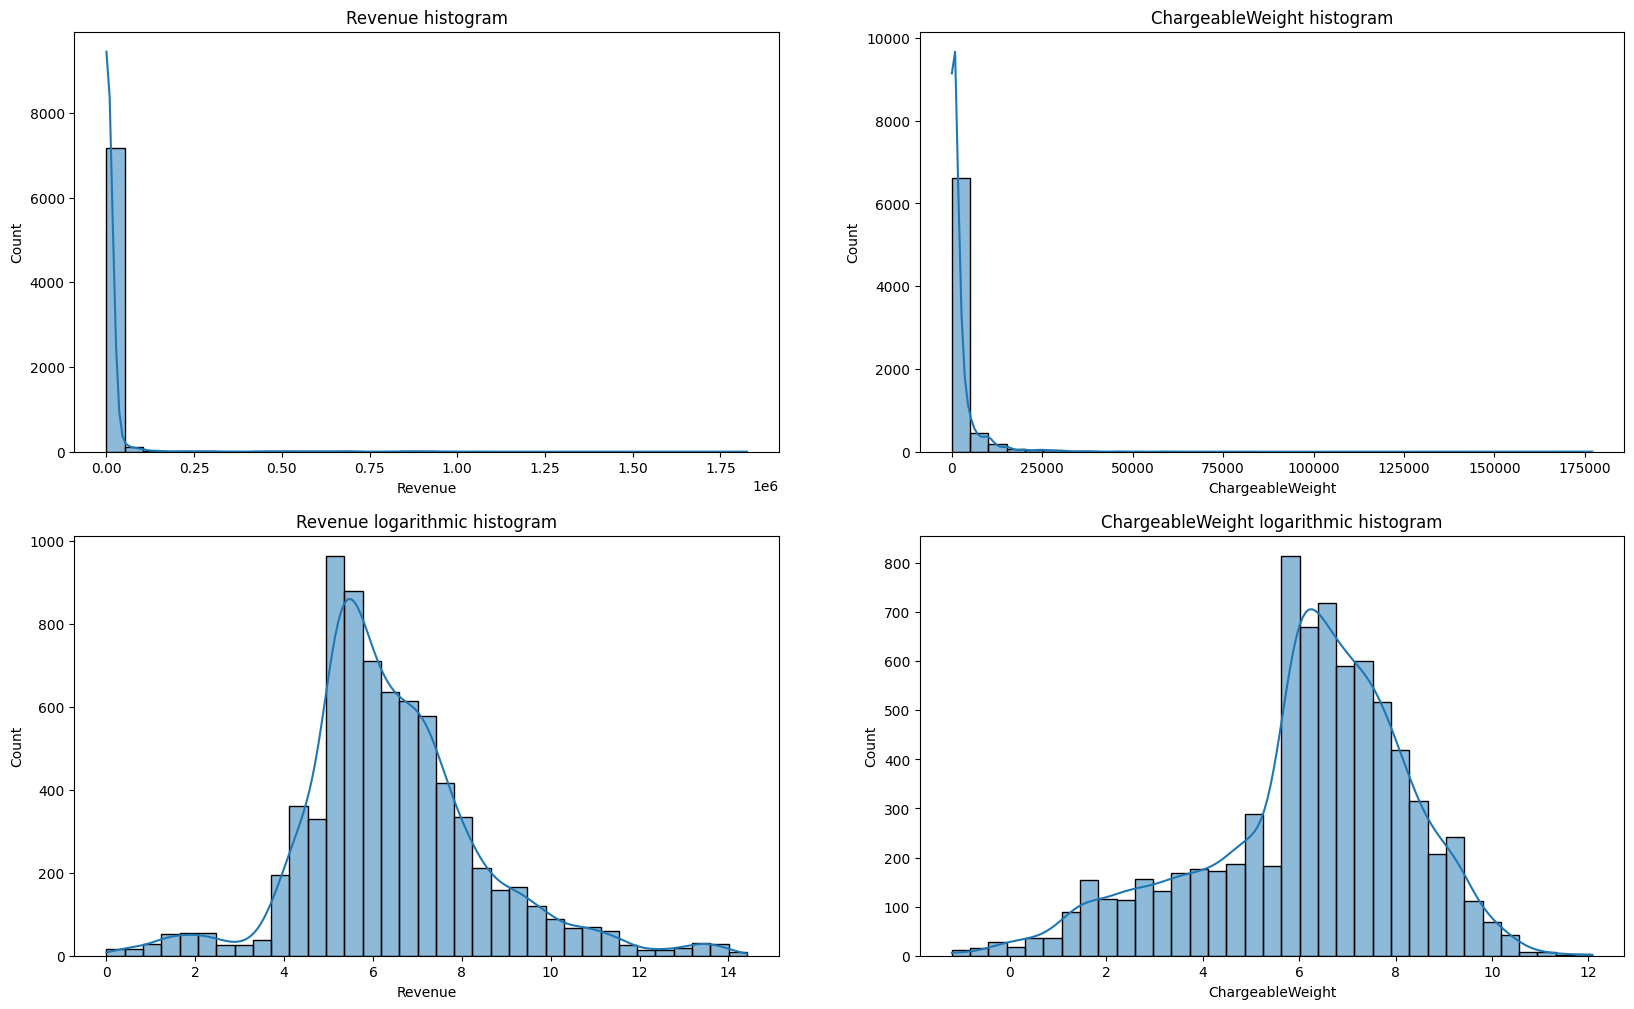

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20, 12))
sns.histplot(df['Revenue'], kde=True, bins=35, ax=ax1).set_title("Revenue histogram")
sns.histplot(df['ChargeableWeight'], kde=True, bins=35, ax=ax2).set_title("ChargeableWeight histogram")
sns.histplot(np.log(df['Revenue'] + 1), kde=True, bins=35, ax=ax3).set_title("Revenue logarithmic histogram")
sns.histplot(np.log(df['ChargeableWeight']), kde=True, bins=35, ax=ax4).set_title("ChargeableWeight logarithmic histogram")
plt.show()

Both variables present a very wide range of values. To improve that, we can choose to re-express them on a logarithmic scale, making the distribution more symmetrical and stabilizing the variance. This is the common transformation used with right-skewed distributions.

In the case of *Revenue*, we add 1 to avoid 0 values.

## **Statistical measures**

From now, we will use the encoded dataframe, *df_encoded*.

**Measures of central tendency**

They are the values around which the others are grouped.

Let's find out the number of clients making payments above the population mean and the population median.

In [31]:
per_ab_mean = df_encoded[df_encoded['Revenue'] > df_encoded['Revenue'].mean()].shape[0] / df_encoded.shape[0] * 100;
per_ab_median = df_encoded[df_encoded['Revenue'] > df_encoded['Revenue'].median()].shape[0] / df_encoded.shape[0] * 100;
print("The calculation of mean gives a value of $" + str(df_encoded['Revenue'].mean()) + " and that of the median $" + str(df_encoded['Revenue'].median()))
print("This implies that " + str(per_ab_median) + "% of the clients pay above the median, while only " + str(per_ab_mean) + "% pay above the mean")

The calculation of mean gives a value of $13533.753742183288 and that of the median $470.055
This implies that 50.0% of the clients pay above the median, while only 7.142857142857142% pay above the mean


Both results are tremendously different. The nature of the *Revenue* variable forces us to take the median as the measure of central tendency, since it is much more representative as it is not influenced by outliers.

**Measures of non-central tendency**

They allow the data set to be divided into equal percentage parts and are used to classify an observation.

In [32]:
print("To divide our data into four parts, we need three quartiles: \n- Q1 is $" + str(df_encoded['Revenue'].describe()[4]) +
      ", \n- Q2 is $" + str(df_encoded['Revenue'].describe()[5]) + ", and \n- Q3 is $" + str(df_encoded['Revenue'].describe()[6]))

print("\n")

print("To divide our data into ten parts, we need nine deciles: \n- D1 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[0]) +
      ", \n- D2 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[1]) + ", \n- D3 is $" +
      str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[2]) + ", \n- D4 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[3]) +
      ", \n- D5 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[4]) + ", \n- D6 is $" +
      str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[5]) + ", \n- D7 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[6]) +
      ", \n- D8 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[7]) + ", and \n- D9 is $" +
      str(np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1))[8]))

print("\n")

print("To divide our data into one hundred parts, we need ninety-nine percentiles: \n- P1 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.01, 1, 0.01))[0]) +
      "\n - ..." + ", and \n- P99 is $" + str(np.quantile(df_encoded['Revenue'], q = np.arange(0.01, 1, 0.01))[98]))

To divide our data into four parts, we need three quartiles: 
- Q1 is $184.9375, 
- Q2 is $470.055, and 
- Q3 is $1639.3


To divide our data into ten parts, we need nine deciles: 
- D1 is $80.56, 
- D2 is $163.84, 
- D3 is $218.84100000000004, 
- D4 is $310.60800000000006, 
- D5 is $470.055, 
- D6 is $756.1279999999999, 
- D7 is $1249.0660000000003, 
- D8 is $2271.080000000002, and 
- D9 is $7996.662000000004


To divide our data into one hundred parts, we need ninety-nine percentiles: 
- P1 is $2.719
 - ..., and 
- P99 is $474265.2499999977


In [33]:
# Function that returns the quartile, decile and percentile of an observation
def getPosition(index_observation):
  return (df_encoded['Revenue'][index_observation], pd.qcut(df_encoded['Revenue'], 4, labels=False)[index_observation],
  pd.qcut(df_encoded['Revenue'], 10, labels=False)[index_observation], pd.qcut(df_encoded['Revenue'], 100, labels=False)[index_observation])

For a given index, we can find the quartile, decile, and percentile of its corresponding value

In [34]:
index = 7419
print("At index " + str(index) + ", the value $" + str(getPosition(index)[0]) + " is in:\n- Quartile " + str(getPosition(index)[1]) +
      " (from 0 to 3)\n- Decile " + str(getPosition(index)[2]) + " (from 0 to 9)\n- Percentile " + str(getPosition(index)[3]) + " (from 0 to 99)")

At index 7419, the value $315.12 is in:
- Quartile 1 (from 0 to 3)
- Decile 4 (from 0 to 9)
- Percentile 40 (from 0 to 99)


If we establish a range of thresholds based on deciles, we can know the clients willing to pay a certain price.

In [35]:
threshold = np.quantile(df_encoded['Revenue'], q = np.arange(0.1, 1, 0.1)).tolist()
list_clients_above = []
list_per_clients_above = []
list_clients_below = []
list_per_clients_below = []

for i in range(9):
  clients_above = len(df_encoded[df_encoded['Revenue'] > threshold[i]])
  per_clients_above = clients_above/len(df_encoded)
  clients_below = len(df_encoded) - clients_above
  per_clients_below = clients_below/len(df_encoded)

  list_clients_above.append(clients_above)
  list_per_clients_above.append(per_clients_above)
  list_clients_below.append(clients_below)
  list_per_clients_below.append(per_clients_below)

dict = {'threshold' : threshold,
        'Clients willing to pay' : list_clients_above,
        'Percentage willing to pay' : list_per_clients_above,
        'Clients not willing to pay' : list_clients_below,
        'Percentage not willing to pay' : list_per_clients_below}
df_deciles = pd.DataFrame(dict)
display(df_deciles)

,threshold,Clients willing to pay,Percentage willing to pay,Clients not willing to pay,Percentage not willing to pay
0,80.560,6662,0.897844,758,0.102156
1,163.840,5921,0.797978,1499,0.202022
2,218.841,5194,0.700000,2226,0.300000
3,310.608,4452,0.600000,2968,0.400000
4,470.055,3710,0.500000,3710,0.500000
5,756.128,2968,0.400000,4452,0.600000
6,1249.066,2226,0.300000,5194,0.700000
7,2271.080,1484,0.200000,5936,0.800000
8,7996.662,742,0.100000,6678,0.900000


Let's check if there is a correlation between the numeric variables.

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FlownYear,ChargeableWeight,Pieces,Revenue
FlownYear,NaN,NaN,NaN,NaN
ChargeableWeight,NaN,1.000000,0.317356,0.072400
Pieces,NaN,0.317356,1.000000,0.072934
Revenue,NaN,0.072400,0.072934,1.000000


*Pieces* and *ChargeableWeight* would be at the limit of a low positive correlation. However, we can assume that correlations are negligible or nonexistent. As a consequence, they are not linearly dependent.